In [94]:
from albumentations.pytorch import ToTensorV2
import torch
from time import time
import numpy as np
from torch.utils.data import Dataset
from torchvision.io import read_image
from glob import glob
import os
import albumentations as A
from torchvision import transforms
from torch.utils.data import DataLoader
from tqdm.notebook import tqdm
import cv2
from PIL import Image
import matplotlib.pyplot as plt

In [100]:
image_dir = "D:\portrait"
batchsize = 64
img_size = (256, 256)
n=50

  0%|          | 0/50 [00:00<?, ?it/s]

2.0211456346511842
<class 'torch.Tensor'> torch.Size([64, 3, 256, 256])
tensor([[[ 92,  88,  88,  ..., 180, 178, 210],
         [ 92,  81,  92,  ..., 203, 188, 188],
         [ 96,  88,  86,  ..., 177, 195, 201],
         ...,
         [ 62,  62,  62,  ..., 151, 171, 168],
         [ 70,  70,  65,  ..., 170, 169, 171],
         [ 73,  63,  80,  ..., 180, 174, 179]],

        [[ 70,  66,  66,  ..., 161, 158, 189],
         [ 70,  59,  70,  ..., 184, 168, 175],
         [ 74,  66,  64,  ..., 159, 175, 175],
         ...,
         [ 42,  41,  42,  ..., 122, 142, 139],
         [ 49,  49,  45,  ..., 142, 141, 142],
         [ 52,  43,  61,  ..., 155, 149, 154]],

        [[ 56,  52,  52,  ..., 126, 131, 168],
         [ 56,  45,  56,  ..., 149, 141, 141],
         [ 60,  52,  50,  ..., 124, 148, 163],
         ...,
         [ 37,  38,  41,  ...,  80, 100, 101],
         [ 46,  44,  37,  ..., 105, 104, 106],
         [ 51,  36,  46,  ..., 125, 119, 121]]], dtype=torch.uint8)
tensor(0, dtype

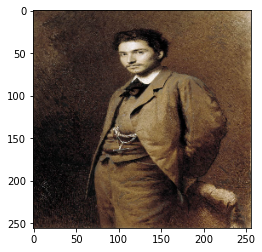

In [101]:
class TorchReadImageDS(Dataset):
    def __init__(self, image_dir, split="train", transform=None, target_transform=None):
        assert split in ["train", "test"]
        self.img_dir = os.path.join(image_dir, split)
        self.transform = transform
        self.target_transform = target_transform
        self.images = glob(self.img_dir + "/*.*")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = read_image(img_path)
        if self.transform:
            image_out = self.transform(image)
        if self.target_transform:
            target_out = self.target_transform(image)
        return image_out, target_out

transform_torch = transforms.Compose([
    transforms.Resize(img_size),
#     transforms.ToTensor(),
])

ds = TorchReadImageDS(image_dir, transform=transform_torch, target_transform=transform_torch)
dl = DataLoader(ds, batch_size=batchsize, shuffle=True)

times = []
for i in tqdm(range(n)):
    it = iter(dl)
    t0 = time()
    src, tgt = next(it)
    times.append(time()-t0)
print(np.mean(times))
print(type(src), src.shape)
print(src[0])
print(src.min(), src.max())
plt.imshow(src[0].permute([1,2,0]))
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

1.2945943307876586
<class 'torch.Tensor'> torch.Size([64, 3, 256, 256])
tensor([[[0.9961, 1.0000, 0.9922,  ..., 0.9686, 0.9412, 0.9490],
         [0.9961, 0.9961, 0.9922,  ..., 0.9647, 0.9216, 0.9647],
         [1.0000, 0.9961, 0.9765,  ..., 0.9490, 0.9451, 0.9529],
         ...,
         [1.0000, 0.9843, 0.9961,  ..., 0.9569, 0.9608, 0.9647],
         [1.0000, 0.9961, 1.0000,  ..., 0.9686, 0.9647, 0.9647],
         [0.9961, 0.9961, 0.9882,  ..., 0.9686, 0.9804, 0.9765]],

        [[1.0000, 0.9529, 0.9373,  ..., 0.8745, 0.8235, 0.8431],
         [1.0000, 0.9529, 0.9569,  ..., 0.8431, 0.8392, 0.8392],
         [1.0000, 0.9098, 0.8667,  ..., 0.8549, 0.8235, 0.8353],
         ...,
         [1.0000, 0.9255, 0.9333,  ..., 0.8353, 0.8471, 0.8471],
         [0.9961, 0.9255, 0.9333,  ..., 0.8471, 0.8510, 0.8235],
         [0.9961, 0.9529, 0.9608,  ..., 0.8431, 0.8353, 0.8510]],

        [[0.9765, 0.8824, 0.8275,  ..., 0.7373, 0.6941, 0.7255],
         [0.9765, 0.8549, 0.8549,  ..., 0.7176, 0.7

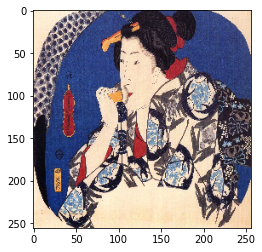

In [102]:
class CV2AlbDS(Dataset):
    def __init__(self, image_dir, split="train", transform=None, target_transform=None):
        assert split in ["train", "test"]
        self.img_dir = os.path.join(image_dir, split)
        self.transform = transform
        self.target_transform = target_transform
        self.images = glob(self.img_dir + "/*.*")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        if self.transform:
            image_out = self.transform(image=image)["image"]
        if self.target_transform:
            target_out = self.target_transform(image=image)["image"]
        return image_out, target_out
    
transform_alb = A.Compose([
    A.Resize(img_size[0], img_size[1]),
    A.Normalize(mean=(0), std=(1)),
    ToTensorV2(),
])

ds = CV2AlbDS(image_dir, transform=transform_alb, target_transform=transform_alb)
dl = DataLoader(ds, batch_size=batchsize, shuffle=True)

times = []
for i in tqdm(range(n)):
    it = iter(dl)
    t0 = time()
    src, tgt = next(it)
    times.append(time()-t0)
print(np.mean(times))
print(type(src), src.shape)
print(src[0])
print(src.min(), src.max())
plt.imshow(src[0].permute([1,2,0]))
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

2.8643499040603637
<class 'torch.Tensor'> torch.Size([64, 3, 256, 256])
tensor([[[0.6516, 0.4343, 0.3279,  ..., 0.4136, 0.4252, 0.4544],
         [0.4596, 0.3970, 0.4365,  ..., 0.5245, 0.4418, 0.4353],
         [0.6688, 0.5027, 0.6517,  ..., 0.5002, 0.4679, 0.4634],
         ...,
         [0.4238, 0.4758, 0.3399,  ..., 0.3280, 0.4489, 0.4615],
         [0.5895, 0.5867, 0.5474,  ..., 0.2455, 0.3466, 0.5437],
         [0.4600, 0.2609, 0.4598,  ..., 0.3723, 0.4285, 0.7468]],

        [[0.5169, 0.2711, 0.1567,  ..., 0.3548, 0.3781, 0.4073],
         [0.3481, 0.2602, 0.2804,  ..., 0.4657, 0.3947, 0.3882],
         [0.5651, 0.3793, 0.5015,  ..., 0.4453, 0.4208, 0.4163],
         ...,
         [0.2826, 0.3437, 0.2262,  ..., 0.3790, 0.4424, 0.4576],
         [0.4487, 0.4559, 0.4337,  ..., 0.2965, 0.3272, 0.5278],
         [0.3292, 0.1311, 0.3422,  ..., 0.4232, 0.4080, 0.7294]],

        [[0.3964, 0.2406, 0.1050,  ..., 0.3351, 0.3311, 0.3602],
         [0.1093, 0.1095, 0.1640,  ..., 0.4382, 0.3

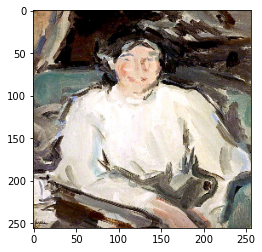

In [103]:
class CV2TorchDS(Dataset):
    def __init__(self, image_dir, split="train", transform=None, target_transform=None):
        assert split in ["train", "test"]
        self.img_dir = os.path.join(image_dir, split)
        self.transform = transform
        self.target_transform = target_transform
        self.images = glob(self.img_dir + "/*.*")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = cv2.imread(img_path)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#         image = Image.fromarray(image)
#         image = Image.open(img_path)
        if self.transform:
            image_out = self.transform(image)
        if self.target_transform:
            target_out = self.target_transform(image)
        return image_out, target_out
    
transform_torch = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(img_size),
])

ds = CV2TorchDS(image_dir, transform=transform_torch, target_transform=transform_torch)
dl = DataLoader(ds, batch_size=batchsize, shuffle=True)

times = []
for i in tqdm(range(n)):
    it = iter(dl)
    t0 = time()
    src, tgt = next(it)
    times.append(time()-t0)
print(np.mean(times))
print(type(src), src.shape)
print(src[0])
print(src.min(), src.max())
plt.imshow(src[0].permute([1,2,0]))
plt.show()

  0%|          | 0/50 [00:00<?, ?it/s]

2.6013556861877443
<class 'torch.Tensor'> torch.Size([64, 3, 256, 256])
tensor([[[0.1610, 0.6791, 0.8003,  ..., 0.2647, 0.6143, 0.6348],
         [0.1329, 0.7173, 0.8091,  ..., 0.2274, 0.5870, 0.5377],
         [0.1265, 0.6674, 0.8189,  ..., 0.2021, 0.6722, 0.6244],
         ...,
         [0.6911, 0.6079, 0.3483,  ..., 0.4387, 0.4214, 0.3996],
         [0.6905, 0.5631, 0.8731,  ..., 0.3072, 0.3381, 0.2683],
         [0.6528, 0.6891, 0.7591,  ..., 0.8537, 0.8477, 0.8876]],

        [[0.2282, 0.5905, 0.7332,  ..., 0.3409, 0.6183, 0.6260],
         [0.2064, 0.6389, 0.7542,  ..., 0.3037, 0.5870, 0.5367],
         [0.1880, 0.6085, 0.7405,  ..., 0.2770, 0.6563, 0.6087],
         ...,
         [0.5594, 0.5002, 0.3358,  ..., 0.1806, 0.1786, 0.1760],
         [0.5215, 0.4374, 0.7829,  ..., 0.1258, 0.1550, 0.1120],
         [0.5599, 0.5795, 0.6346,  ..., 0.8326, 0.8133, 0.8430]],

        [[0.1841, 0.4799, 0.5099,  ..., 0.2895, 0.4940, 0.5059],
         [0.1818, 0.5308, 0.5206,  ..., 0.2500, 0.4

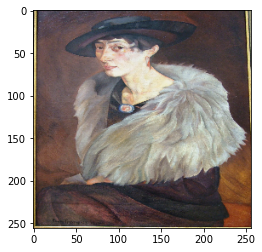

In [104]:
class PLTTorchDS(Dataset):
    def __init__(self, image_dir, split="train", transform=None, target_transform=None):
        assert split in ["train", "test"]
        self.img_dir = os.path.join(image_dir, split)
        self.transform = transform
        self.target_transform = target_transform
        self.images = glob(self.img_dir + "/*.*")

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = self.images[idx]
        image = plt.imread(img_path)
#         image = Image.fromarray(image)
#         image = Image.open(img_path)
        if self.transform:
            image_out = self.transform(image)
        if self.target_transform:
            target_out = self.target_transform(image)
        return image_out, target_out
    
transform_torch = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize(img_size),
])

ds = PLTTorchDS(image_dir, transform=transform_torch, target_transform=transform_torch)
dl = DataLoader(ds, batch_size=batchsize, shuffle=True)

times = []
for i in tqdm(range(n)):
    it = iter(dl)
    t0 = time()
    src, tgt = next(it)
    times.append(time()-t0)
print(np.mean(times))
print(type(src), src.shape)
print(src[0])
print(src.min(), src.max())
plt.imshow(src[0].permute([1,2,0]))
plt.show()